In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

import glob
from datetime import datetime
import ast

import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from crawlab_toolbox.freq_tools import welch_stat
from scipy.stats import describe
from scipy import signal

from DBInserter import DBInserter


plt.rcParams['figure.figsize'] = (15, 4)


In [2]:
assetId = ['IMS2_Bearing1','IMS2_Bearing2','IMS2_Bearing3','IMS2_Bearing4']
sensorId = ['sensor1','sensor1','sensor1','sensor1']

Set No. 2:
Recording Duration: February 12, 2004 10:32:39 to February 19, 2004 06:22:39

No. of Files:984

No. of Channels: 4

Channel Arrangement: 

Bearing 1 –Ch 1; 
Bearing2 –Ch 2; 
Bearing3 –Ch3; 
Bearing 4 –Ch 4.

File Recording Interval: Every 10 minutes
File Format: ASCII
Description: At  the  end  of  the  test-to-failure  experiment,  outer  race  failure  occurred  in bearing 1.

AssetId = Bearing1-Set1
SensorId = Channel1

In [3]:
# load, average and merge sensor samples
data_dir = '../../Data/Bearings/IMS/2nd_test/'


In [4]:
fileNames = os.listdir(data_dir)
files = [f for f in glob.glob(data_dir + '/2004*', recursive=True)]


samplingRate = int(20e3)
fftPoints = 2048

bearing1FFT = np.empty((len(files),1025))
bearing2FFT = np.empty((len(files),1025))
bearing3FFT = np.empty((len(files),1025))
bearing4FFT = np.empty((len(files),1025))
datetime_strings = []

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/Bearings/IMS/2nd_test/'

In [78]:
def parse_file(filename,inserter,index=0):
    global bearing1FFT
    global bearing2FFT
    global bearing3FFT
    global bearing4FFT

    dataset = pd.read_csv(filename, sep='\t')
    
    data = dataset.values
    
    datetime_object = datetime.strptime(filename.split('/')[-1], '%Y.%m.%d.%H.%M.%S')
    datetime_string = datetime_object.strftime('%Y-%m-%d %H:%M:%S.%f')
    
    datetime_strings.append(datetime_string)
 
#     freqs,amps,stdevs = welch_stat(data.T,fs=samplingRate,nperseg=fftPoints)
    freqs,amps = signal.welch(data.T, fs=samplingRate, window='hanning', nperseg=fftPoints)
    

    bearing1FFT[index,:] = amps[0,:]
    bearing2FFT[index,:] = amps[1,:]
    bearing3FFT[index,:] = amps[2,:]
    bearing4FFT[index,:] = amps[3,:]
    
    



In [79]:
inserter = DBInserter('dbt1')
parse_file(files[0],inserter)
for j in range(len(files)):
    parse_file(files[j],inserter,j)
    

In [85]:
pd.DataFrame(np.array(datetime_strings)).to_csv('bearingFFT_datetime.csv')

In [86]:
np.savetxt('data/bearing1FFT.csv', bearing1FFT, delimiter=',',)
np.savetxt('data/bearing2FFT.csv', bearing2FFT, delimiter=',',)
np.savetxt('data/bearing3FFT.csv', bearing3FFT, delimiter=',',)
np.savetxt('data/bearing4FFT.csv', bearing4FFT, delimiter=',',)
# np.savetxt('bearingFFT_datetime.csv',np.array([datetime_strings]),delimiter=',')

In [12]:
dataset = pd.read_csv(files[0], sep='\t')
data = dataset.values
freqs,amps,stdevs = welch_stat(dataset.values.T,fs=samplingRate,nperseg=fftPoints,average=None)
amps.shape[2]

18

(4, 257)
(4, 257)


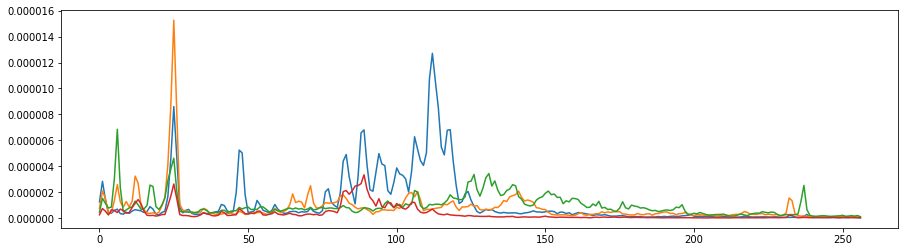

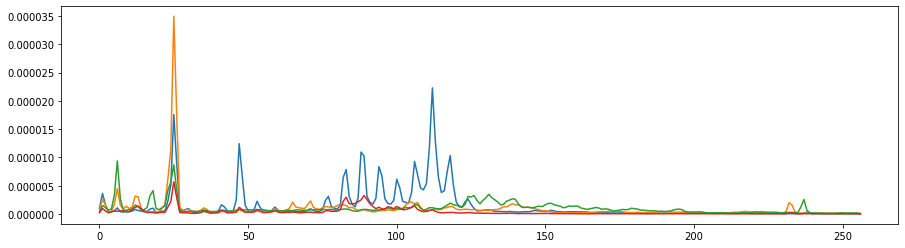

In [39]:
print(amps.shape)
print(stdevs.shape)
plt.plot(stdevs.T)
plt.show()

plt.plot(amps.T)
plt.show()

In [ ]:

this_rms = np.sqrt(1 / np.array(dataset).shape[0] * np.sum(np.array(dataset)**2,axis=0))

_,minmax,mean,variance,skewness,kurtosis = describe(data)

NyquistFrequency = 0.5 / samplingInterval

freqs,amps = signal.welch(data, fs=1 / samplingInterval, nperseg=fftPoints)

frequencyInterval = freqs[1] - freqs[0]

sampleRMS = np.sqrt(1 / data.shape[0] * np.sum(data**2))